In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from method import IV
from simulator import Simulator
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
from exana.statistics import plot_xcorr
from tools import savefig, fix_figure, coef_var, corrcoef
import copy
from IPython.display import display

rc = {
    'figure.figsize' : (16, 9),
    'axes.labelsize' : 25,
    'lines.linewidth': 2,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'axes.titlesize' : 20,
    'font.size'      : 20,
    'legend.frameon' : False,
    'legend.fontsize': 20,
    'font.family'    : 'serif',
#     'font.serif'     : Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
#     'font.sans-serif': Helvetica, Avant Garde, Computer Modern Sans serif
#     'font.cursive'   : Zapf Chancery
#     'font.monospace' : Courier, Computer Modern Typewriter
    'text.usetex'    : True
}
sns.set(rc=rc)
sns.set_color_codes()
sns.set_style('white')
plt.rcParams.update(rc)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def fix_underscore(s):
    subs = s.split('_')
    if len(subs) in [2,3]:
        label = ''.join([subs[0]] + ['$'] + 
                        [t + '{' + ss + '}' for ss, t in zip(subs[1:], ['_', '^'])] + 
                        ['$'])
    elif len(subs) == 1:
        label = s
    else:
        raise ValueError('Found {} underscores'.format(len(subs)))
    return label

def heatmap(data, x, y, z, **kwargs):
    data = data.drop_duplicates()
    mtx = np.zeros((len(data[y].unique()),len(data[x].unique())))
    mtx.fill(np.nan)
    _xx = np.zeros(len(data[x].unique()))
    _yy = np.zeros(len(data[y].unique()))
    for i,_y in enumerate(sorted(data[y].unique())):
        for j,_x in enumerate(sorted(data[x].unique())):
            val = data.loc[(data[x]==_x) & (data[y]==_y)][z]
            if len(val) == 1:
                val = val.values
            elif len(val) > 1:
                assert np.all(np.diff(val) == 0)
                val = val.values[0]
            else:
                val = np.nan
            mtx[i, j] = val
            _xx[j] = _x
            _yy[i] = _y
    mask = np.zeros_like(mtx, dtype=np.bool)
    mask[np.isnan(mtx)] = True
    df = pd.DataFrame(mtx, index=_yy.round(2), columns=_xx.round(2))
    df.index.name = fix_underscore(y)
    df.columns.name = fix_underscore(x)
    zlabel = fix_underscore(z)
    plt.figure()
    sns.heatmap(df, mask=mask, cbar_kws={'label': zlabel}, **kwargs)
#     return mtx

In [3]:
interest = ['CC_max', 'CC_mean', 'CC_min', 'CV_max', 'CV_mean','CV_min', 
           'J', 'g', 'eta', 'eps', 'rate_ex', 'rate_in', 'p_var', 'tau_syn_in', 'tau_syn_ex']

# eta g tau_syn = 1.0

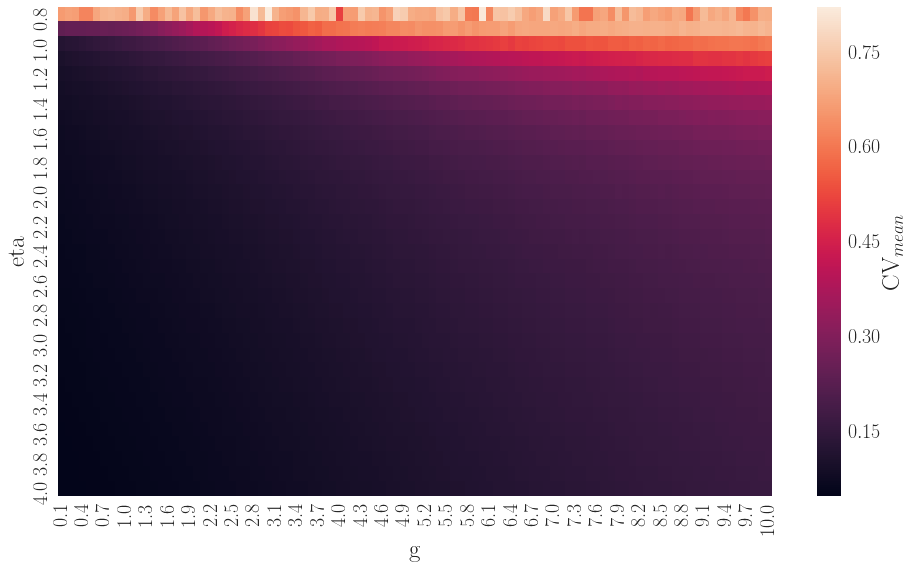

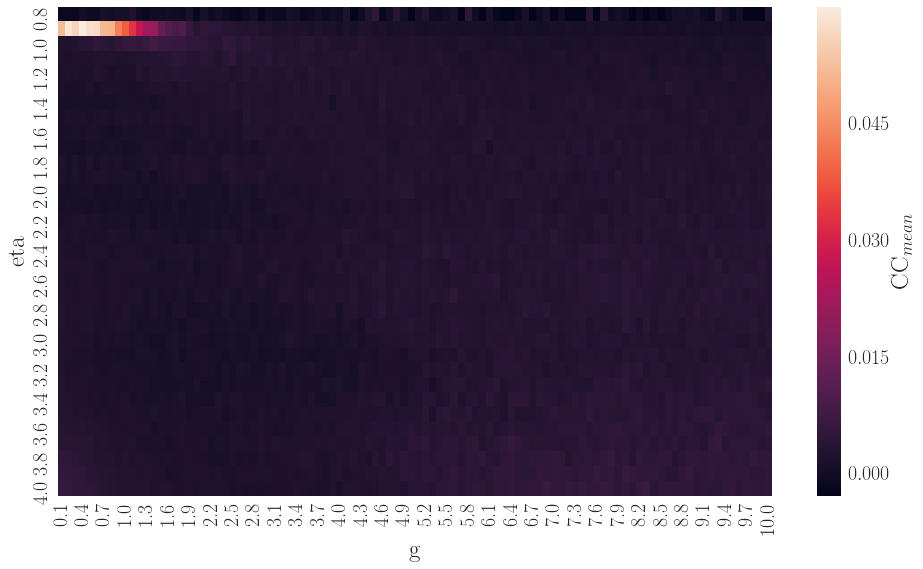

In [6]:
data = pd.read_csv('results/sweep_eta_g_tau_syn10.csv')

heatmap(data, 'g', 'eta', 'CV_mean')
heatmap(data, 'g', 'eta', 'CC_mean')

In [14]:
data[(data.CV_mean > .5) & 
     (data.CC_mean < 0.1) & 
     (data.rate_ex > 2)].loc[:,interest].sort_values('CV_mean',ascending=False)

,CC_max,CC_mean,CC_min,CV_max,CV_mean,CV_min,J,g,eta,eps,rate_ex,rate_in,p_var,tau_syn_in,tau_syn_ex
198,0.196439,0.000822,-0.028733,1.550971,0.719593,0.304806,0.2,9.9,0.9,0.1,3.2440,3.2160,0.5,1.0,1.0
195,0.221371,0.000536,-0.028273,1.474694,0.718383,0.243788,0.2,9.6,0.9,0.1,3.3398,3.2824,0.5,1.0,1.0
190,0.177134,0.000570,-0.034064,1.424655,0.714451,0.349155,0.2,9.1,0.9,0.1,3.3980,3.3584,0.5,1.0,1.0
191,0.222745,0.000453,-0.031573,1.448835,0.714259,0.352974,0.2,9.2,0.9,0.1,3.3900,3.3632,0.5,1.0,1.0
192,0.207588,0.000413,-0.033588,1.832372,0.713105,0.226601,0.2,9.3,0.9,0.1,3.3566,3.3336,0.5,1.0,1.0
194,0.202269,0.000545,-0.032422,1.430433,0.713059,0.337640,0.2,9.5,0.9,0.1,3.3366,3.2872,0.5,1.0,1.0
199,0.241014,0.000702,-0.026516,1.477076,0.711185,0.302123,0.2,10.0,0.9,0.1,3.1564,3.1752,0.5,1.0,1.0
187,0.213067,0.000714,-0.030773,1.468126,0.710702,0.251174,0.2,8.8,0.9,0.1,3.5322,3.4456,0.5,1.0,1.0
193,0.195361,0.001049,-0.030928,1.411362,0.710490,0.357846,0.2,9.4,0.9,0.1,3.3020,3.2976,0.5,1.0,1.0
196,0.232097,0.000780,-0.027730,1.730789,0.708981,0.276772,0.2,9.7,0.9,0.1,3.2996,3.2592,0.5,1.0,1.0


# gauss_mean gauss_std

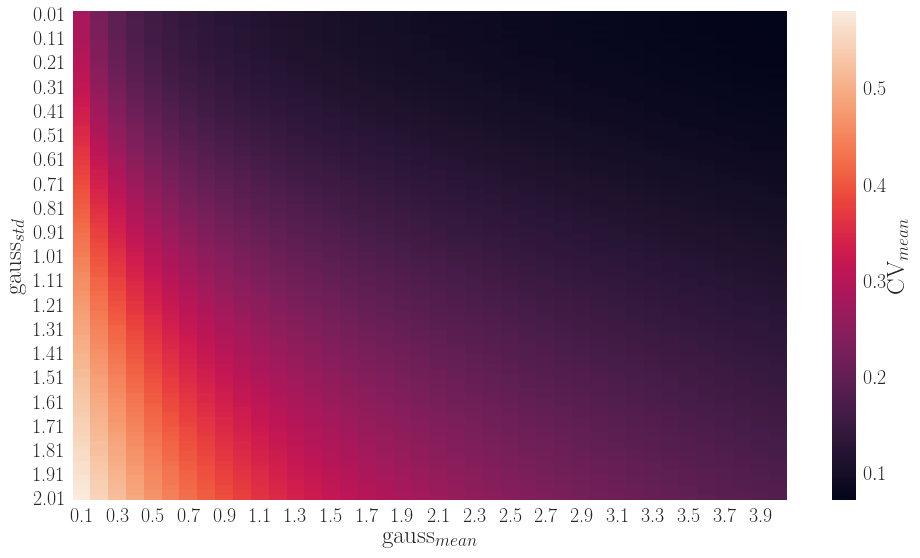

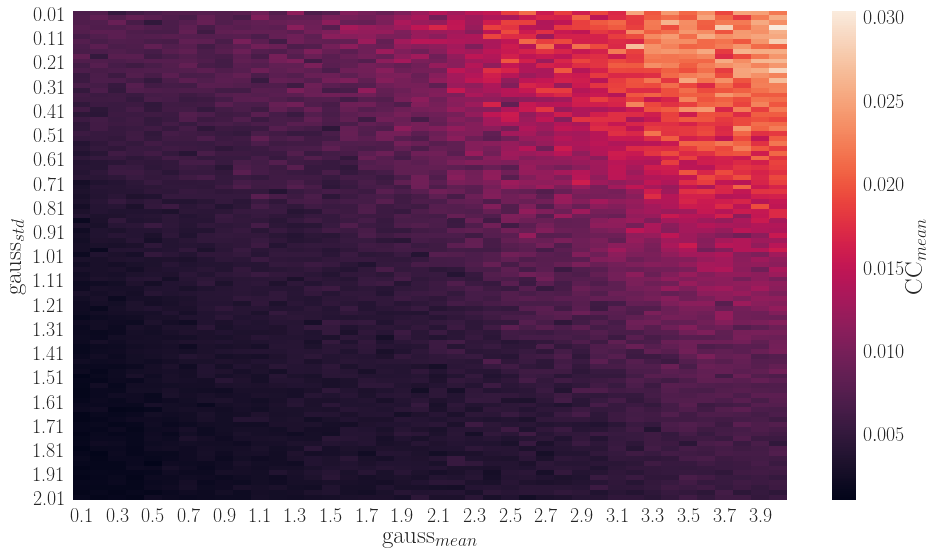

In [6]:
data = pd.read_csv('results/sweep_gauss_m_s.csv')

heatmap(data, 'gauss_mean', 'gauss_std', 'CV_mean')
heatmap(data, 'gauss_mean', 'gauss_std', 'CC_mean')

In [7]:
data[(data.CV_mean > 1) & (data.CC_mean > 0.1)].loc[:,interest]

,CC_max,CC_mean,CC_min,CV_max,CV_mean,CV_min,J,g,eta,eps,rate_ex,rate_in,p_var,tau_syn_in,tau_syn_ex


In [8]:
data[(data.CV_mean > 1) & 
     (data.CC_mean < 0.1) & 
     (data.rate_ex < 50)].loc[:,interest].sort_values('rate_ex',ascending=True)

,CC_max,CC_mean,CC_min,CV_max,CV_mean,CV_min,J,g,eta,eps,rate_ex,rate_in,p_var,tau_syn_in,tau_syn_ex


# eps g

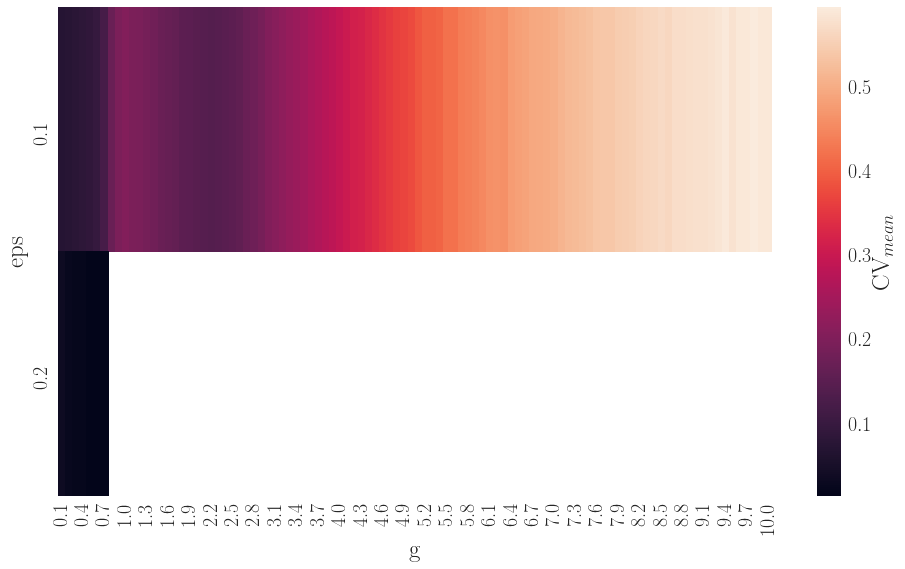

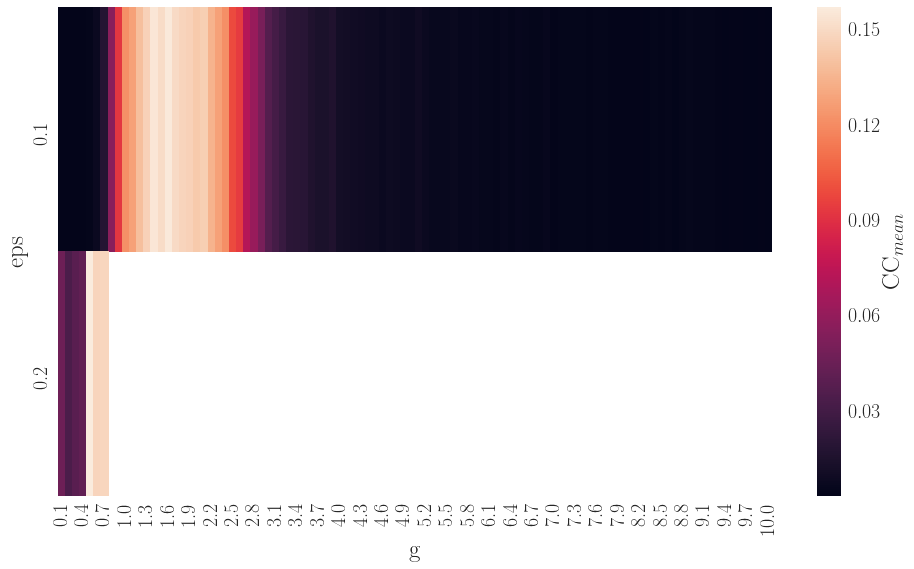

In [12]:
data = pd.read_csv('results/sweep_eps_g.csv')

heatmap(data, 'g', 'eps', 'CV_mean')
heatmap(data, 'g', 'eps', 'CC_mean')

In [27]:
data[(data.CV_mean > 1) & (data.CC_mean > 0.01) & (data.rate_ex < 100)].loc[:,interest]

,CC_max,CC_mean,CC_min,CV_max,CV_mean,CV_min,J,g,eta,eps,rate_ex,rate_in,p_var
24,0.592813,0.149081,0.0,1.733718,1.390532,1.045455,0.5,2.5,0.7,0.1,8.0888,8.136,0.5


In [37]:
data[(data.CV_mean > .5) & 
     (data.CC_mean < 0.1) & 
     (data.rate_ex < 50)].loc[:,interest].sort_values('g',ascending=True)

,CC_max,CC_mean,CC_min,CV_max,CV_mean,CV_min,J,g,eta,eps,rate_ex,rate_in,p_var
32,0.208344,0.003486,-0.131591,1.479492,0.527975,0.109261,0.5,3.3,0.7,0.1,24.363861,26.349780,0.5
33,0.177329,0.003853,-0.143097,1.517623,0.577072,0.135867,0.5,3.4,0.7,0.1,21.048829,22.758079,0.5
34,0.186241,0.002967,-0.118337,1.401678,0.589720,0.109647,0.5,3.5,0.7,0.1,18.388053,20.030568,0.5
185,0.164661,0.002365,-0.157167,1.396138,0.520266,0.086510,0.5,3.6,0.8,0.1,25.729463,28.077056,0.5
35,0.155016,0.003189,-0.119182,1.471118,0.621137,0.115483,0.5,3.6,0.7,0.1,16.836685,18.201739,0.5
36,0.196490,0.002245,-0.085148,1.425386,0.620627,0.096521,0.5,3.7,0.7,0.1,15.455050,16.764035,0.5
186,0.156945,0.001946,-0.139590,1.538392,0.547216,0.084079,0.5,3.7,0.8,0.1,23.847536,25.739056,0.5
37,0.181928,0.002553,-0.087270,1.369144,0.636630,0.103508,0.5,3.8,0.7,0.1,14.363861,15.430837,0.5
337,0.143391,0.002159,-0.124677,1.562386,0.506548,0.086134,0.5,3.8,0.9,0.1,29.187309,32.169298,0.5
187,0.147988,0.001801,-0.125969,1.420073,0.555412,0.086152,0.5,3.8,0.8,0.1,22.060000,23.673504,0.5


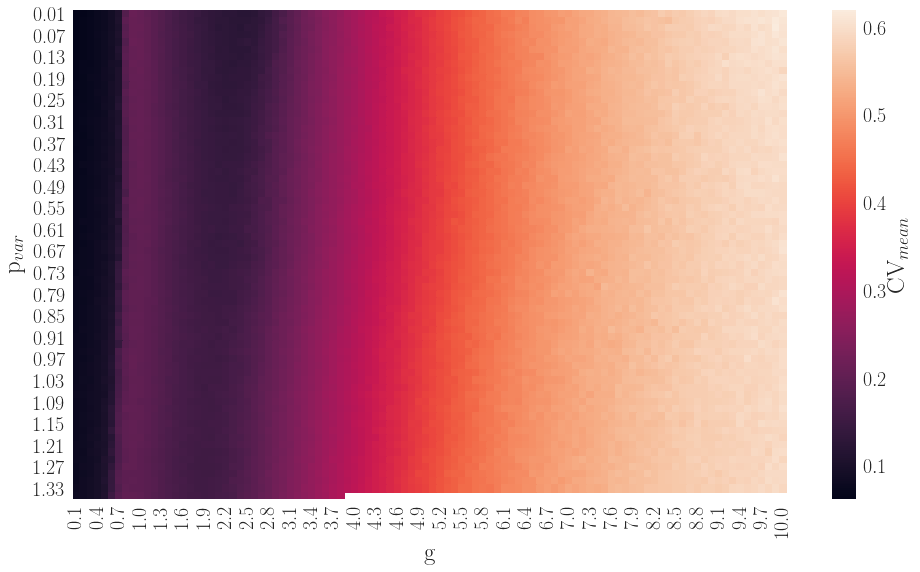

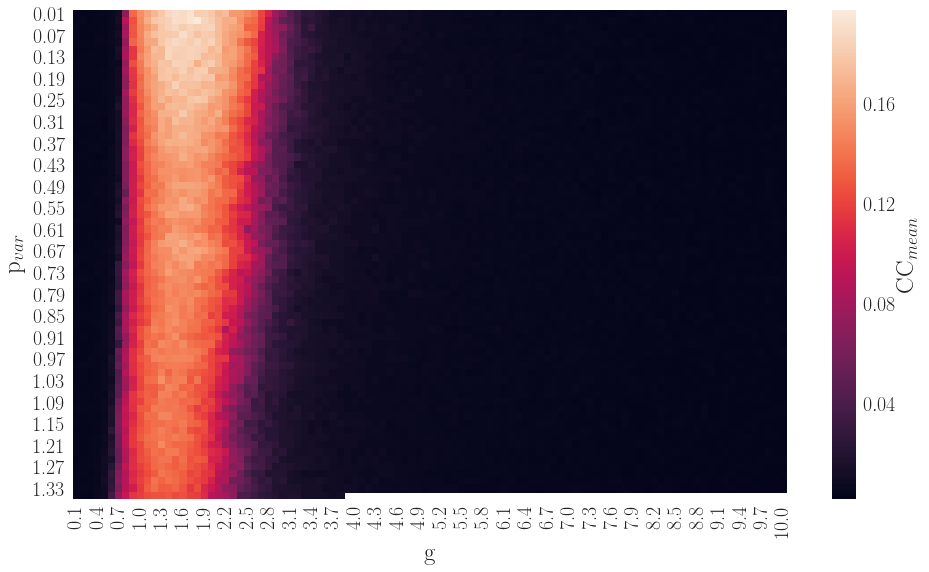

In [11]:
data = pd.read_csv('results/sweep_pvar_g.csv')

heatmap(data, 'g', 'p_var', 'CV_mean')
heatmap(data, 'g', 'p_var', 'CC_mean')

In [42]:
data[(data.CV_mean > 1) & (data.CC_mean > 0.01) & (data.rate_ex < 100)].loc[:,interest]

,CC_max,CC_mean,CC_min,CV_max,CV_mean,CV_min,J,g,eta,eps,rate_ex,rate_in,p_var


In [43]:
data[(data.CV_mean > .1) & 
     (data.CC_mean < 0.1) & 
    (data.g < 4)].loc[:,interest].sort_values('rate_ex',ascending=True)

,CC_max,CC_mean,CC_min,CV_max,CV_mean,CV_min,J,g,eta,eps,rate_ex,rate_in,p_var
38,0.168184,0.003196,-0.078151,1.546437,0.663597,0.130822,0.5,3.9,0.7,0.1,13.136089,13.901299,0.5
37,0.181928,0.002553,-0.087270,1.369144,0.636630,0.103508,0.5,3.8,0.7,0.1,14.363861,15.430837,0.5
36,0.196490,0.002245,-0.085148,1.425386,0.620627,0.096521,0.5,3.7,0.7,0.1,15.455050,16.764035,0.5
35,0.155016,0.003189,-0.119182,1.471118,0.621137,0.115483,0.5,3.6,0.7,0.1,16.836685,18.201739,0.5
34,0.186241,0.002967,-0.118337,1.401678,0.589720,0.109647,0.5,3.5,0.7,0.1,18.388053,20.030568,0.5
188,0.132260,0.002076,-0.110486,1.483501,0.576014,0.082537,0.5,3.9,0.8,0.1,20.617705,22.173504,0.5
33,0.177329,0.003853,-0.143097,1.517623,0.577072,0.135867,0.5,3.4,0.7,0.1,21.048829,22.758079,0.5
187,0.147988,0.001801,-0.125969,1.420073,0.555412,0.086152,0.5,3.8,0.8,0.1,22.060000,23.673504,0.5
186,0.156945,0.001946,-0.139590,1.538392,0.547216,0.084079,0.5,3.7,0.8,0.1,23.847536,25.739056,0.5
32,0.208344,0.003486,-0.131591,1.479492,0.527975,0.109261,0.5,3.3,0.7,0.1,24.363861,26.349780,0.5
